In [52]:
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor




In [31]:
housing_data = fetch_california_housing(as_frame=True)
data = housing_data.frame

data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [27]:
data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [29]:
data.shape

(20640, 9)

In [33]:
data.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
MedHouseVal,0


In [35]:
data.dtypes

,0
MedInc,float64
HouseAge,float64
AveRooms,float64
AveBedrms,float64
Population,float64
AveOccup,float64
Latitude,float64
Longitude,float64
MedHouseVal,float64


In [57]:
X = data[['MedInc','HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']]
y = data['MedHouseVal']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [58]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(mean_absolute_error(y_test, y_pred))
print(root_mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

0.5332001304956553
0.7455813830127764
0.5757877060324508


In [59]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(mean_absolute_error(y_test, y_pred))
print(root_mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

0.45207308139534885
0.7000168546172698
0.6260529308902735


In [60]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(mean_absolute_error(y_test, y_pred))
print(root_mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

0.32831384677810094
0.5064214317102792
0.8042880728429029


In [65]:
if isinstance(model, RandomForestRegressor):
  housing_data = pd.DataFrame({
          'Feature': X_train.columns,
          'Importance': model.feature_importances_
      }).sort_values('Importance', ascending=False)
  print(housing_data)


      Feature  Importance
0      MedInc    0.525809
5    AveOccup    0.137895
6    Latitude    0.089471
7   Longitude    0.088237
1    HouseAge    0.054207
2    AveRooms    0.044642
4  Population    0.030428
3   AveBedrms    0.029310


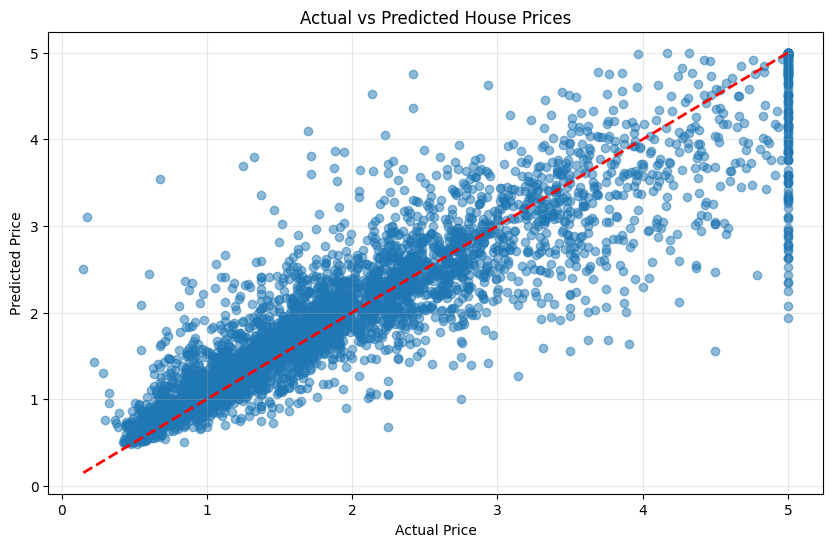

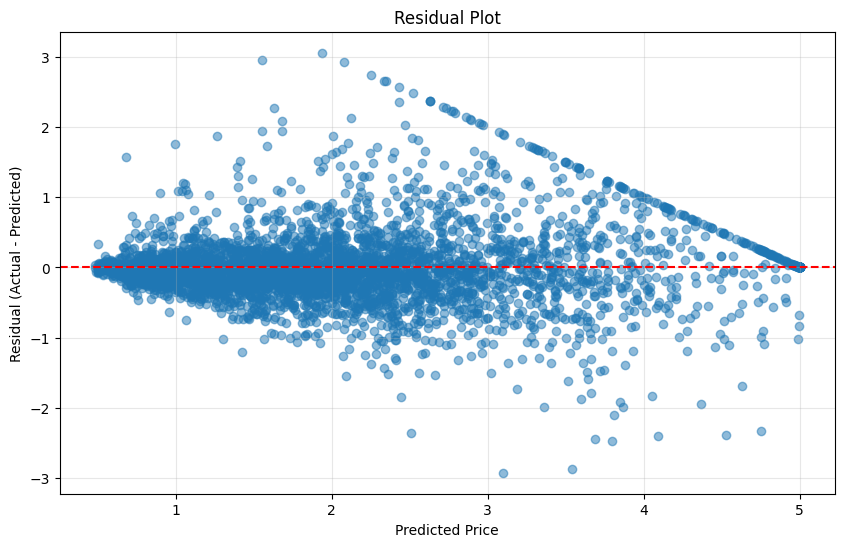

In [66]:
import matplotlib.pyplot as plt

# Plot actual vs predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted House Prices')
plt.grid(True, alpha=0.3)
plt.show()

# Plot residuals (errors)
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Price')
plt.ylabel('Residual (Actual - Predicted)')
plt.title('Residual Plot')
plt.grid(True, alpha=0.3)
plt.show()